### Pipeline ###
 - Pipeline class in sklearn is used to Chain multiple steps one after another.
 - e.g. pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LinearRegression())
])
- Here PolymialFeatures() will be performed first and its output will be fed as input to the next step - LinearRegression()

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [ ]:
def poly_regression_pipeline(degree):

    # Create dataset randomly
    x = 6 * np.random.rand(100, 1) - 3
    y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100, 1)

    # Seperate dataset into train, test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Create a new input feature (x_new) with 200 datapoints between -3 and 3
    x_new = np.linspace(-3, 3, 200).reshape(200, 1)

    # Create objects of PolynomialFeatures and LinearRegression
    polynomialFeatures = PolynomialFeatures(degree=degree)
    linearRegression = LinearRegression()

    # Create a pipeline that first transforms the data to include (1) polynomial features, then fits the (2)linear regression model
    pipeline = Pipeline([
        ('polynomial_features', polynomialFeatures),
        ('linear_regression', linearRegression)
    ])

    pipeline.fit(x_train,y_train)
    print(x_train.shape , y_train.shape)

    # Predit the output y based on new datapoint input = x_new
    y_pred_new = pipeline.predict(x_new)

    #Plotting prediction line
    # plt.scatter(x_new, y_pred_new, color='r',label='Degree'+str(degree),linewidth=2) # Plot Points 
    plt.scatter(x_test,y_test,color='g',label='Test data') # Plot Points``
    plt.scatter(x_train,y_train,color='b',label='Training data') # Plot Points 
    plt.plot(x_new,y_pred_new,'r',linewidth=3) # Plot a line
    plt.legend(loc='upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-3,3,-10,15])
    plt.show();

    

(80, 1) (80, 1)


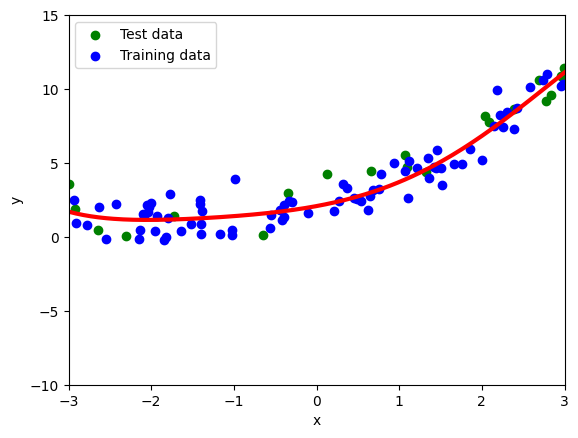

In [48]:
# Line with polynomial degree = 2 : Output - good line fit
# poly_regression_pipeline(2)

# Line with polynomial degree = 3 : Output - better line fit
# poly_regression_pipeline(3)

# Line with polynomial degree = 4 : Output - even better line fit
# poly_regression_pipeline(4)

# Line with polynomial degree = 5 : Output - even better line fit
poly_regression_pipeline(5)

# Line with polynomial degree = 6 : Output - Starting to overfit
# poly_regression_pipeline(6)

# poly_regression_pipeline(15) # Output - Overfitting

